In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.20f}'.format


import warnings
warnings.filterwarnings("ignore")


In [2]:
# Reading the dataset
df= pd.read_csv('/Users/mananthakkar/Desktop/telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38499999999999090505,...,0,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,NaN,968,30.39999999999999857891,0.00000000000000000000,101.20000000000000284217,3.58000000000000007105
1,7001865778,109,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.04699999999999704414,...,0,NaN,1.00000000000000000000,1.00000000000000000000,NaN,1006,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
2,7001625959,109,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.68999999999999772626,...,0,NaN,NaN,NaN,1.00000000000000000000,1103,0.00000000000000000000,0.00000000000000000000,4.16999999999999992895,0.00000000000000000000
3,7001204172,109,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.33799999999999386091,...,0,NaN,NaN,NaN,NaN,2491,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
4,7000142493,109,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.63600000000002410161,...,0,0.00000000000000000000,NaN,NaN,NaN,1526,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000


In [3]:
# checking the shape of the data
df.shape

(99999, 226)

In [4]:
# there 99999 rows and 226 columns in the data

In [5]:
# feature type summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00000000000000000000,99999.00000000000000000000,98981.00000000000000000000,98981.00000000000000000000,98981.00000000000000000000,99999.00000000000000000000,99999.00000000000000000000,99999.00000000000000000000,99999.00000000000000000000,96062.00000000000000000000,...,99999.00000000000000000000,25153.00000000000000000000,25571.00000000000000000000,26339.00000000000000000000,25922.00000000000000000000,99999.00000000000000000000,99999.00000000000000000000,99999.00000000000000000000,99999.00000000000000000000,99999.00000000000000000000
mean,7001207270.38754367828369140625,109.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,282.98735844358338908933,278.53664810647995864201,279.15473145731914428325,261.64506927069436414968,132.39587453937397754089,...,0.08458084580845807998,0.91440384844750133286,0.90876383403073790479,0.89080830707316149830,0.86096751793843062650,1219.85474854748554207617,68.17024770247709852811,66.83906239062376641868,60.02120381203771160017,3.29937319373193682637
std,695669.38629046257119625807,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,328.43976965662801603685,338.15629122688875440872,344.47479058222353387464,341.99862995872183546453,297.20740562016499097808,...,0.65045723453024906213,0.27977234003703804754,0.28795029179251158125,0.31188549216431449285,0.34598709363991259069,954.73384216040710725792,267.58045029735836806140,271.20185558201632147757,253.93822298123157565897,32.40835260458815980655
min,7000000074.00000000000000000000,109.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,-2258.70899999999983265297,-2014.04500000000007275958,-945.80799999999999272404,-1899.50500000000010913936,0.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,180.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
25%,7000606232.50000000000000000000,109.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,93.41149999999998954081,86.98050000000000636646,84.12600000000000477485,62.68500000000000227374,7.37999999999999989342,...,0.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,467.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
50%,7001204632.00000000000000000000,109.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,197.70400000000000773070,191.63999999999998635758,192.08000000000001250555,176.84899999999998954081,34.31000000000000227374,...,0.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,863.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
75%,7001812030.50000000000000000000,109.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,371.06000000000000227374,365.34450000000003910827,369.37049999999999272404,353.46649999999999636202,118.73999999999999488409,...,0.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1807.50000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
max,7002410905.00000000000000000000,109.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,27731.08799999999973806553,35145.83400000000256113708,33543.62400000000343425199,38805.61699999999837018549,7376.71000000000003637979,...,49.00000000000000

In [7]:
# Cheking percent of missing values in columns
pd.DataFrame(df.isnull())

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,False
99995,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
## Imputing the missing values 

In [9]:
# some recharge columns have minimum value of 1 while some don't
column=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

df[column].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.00000000000000000000,25571.00000000000000000000,26339.00000000000000000000,25922.00000000000000000000,25153.00000000000000000000,25571.00000000000000000000,26339.00000000000000000000,25922.00000000000000000000,25153.00000000000000000000,25571.00000000000000000000,26339.00000000000000000000,25922.00000000000000000000,25153.00000000000000000000,25571.00000000000000000000,26339.00000000000000000000,25922.00000000000000000000,25153.00000000000000000000,25571.00000000000000000000,26339.00000000000000000000,25922.00000000000000000000
mean,2.46380153460819784073,2.66641899026240647430,2.65199893693762112079,2.44116966283465774978,1.86466823042976970193,2.04469907316882393289,2.01628763430654167621,1.78180695933955712817,0.59913330417842802778,0.62171991709358254141,0.63571130263107933356,0.65936270349510073263,126.39339243827774339479,126.72945915294670271578,125.71730134021792935073,124.94143970372655871870,192.60098199021987852575,200.98129169762626133888,197.52648885682827994970,192.73431486767995579612
std,2.78912780447979402609,3.03159321968230477395,3.07498747367275004905,2.51633898233038877379,2.57025436187686695533,2.76833249464589936650,2.72013228024416164885,2.21470077179429836178,1.27442830547913588113,1.39452385553451385647,1.42282749211513426246,1.41151268760695680626,108.47723506463555054324,109.76526673640024966971,109.43785127660756018031,111.36376019172557505499,192.64631831559964325606,196.79122377491722772902,191.30130505108579086482,188.40028579776645756283
min,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,0.50000000000000000000,0.50000000000000000000,1.00000000000000000000
25%,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,25.00000000000000000000,25.00000000000000000000,25.00000000000000000000,25.00000000000000000000,82.00000000000000000000,92.00000000000000000000,87.00000000000000000000,69.00000000000000000000
50%,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,2.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,145.00000000000000000000,145.00000000000000000000,145.00000000000000000000,145.00000000000000000000,154.00000000000000000000,154.00000000000000000000,154.00000000000000000000,164.00000000000000000000
75%,3.00000000000000000000,3.00000000000000000000,3.00000000000000000000,3.00000000000000000000,2.00000000000000000000,2.00000000000000000000,2.00000000000000000000,2.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,177.00000000000000000000,177.00000000000000000000,179.00000000000000000000,179.00000000000000000000,252.00000000000000000000,252.00000000000000000000,252.00000000000000000000,252.00000000000000000000
max,61.00000000000000000000,54.00000000000000000000,60.00000000000000000000,84.00000000000000000000,42.00000000000000000000,48.00000000000000000000,44.00000000000000000000,40.00000000000000000000,29.00000000000000000000,35.00000000000000000000,45.000000000

In [10]:
# In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer 
# didn't recharge their numbere that month

In [11]:
# create a list of recharge columns where we will impute missing values with zeroes
imputation = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [12]:
# impute missing values with 0
df[imputation]=df[imputation].apply(lambda x: x.fillna(0))

In [13]:
# checking the missing values percentage again
pd.DataFrame(df.isnull())

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,False
99995,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# dropping columns which have missing values greater than 70%

In [15]:
missing_columns=pd.DataFrame(df.isnull().sum()*100/df.shape[0],columns=['null values']).sort_values(by='null values',ascending=False)

In [16]:
remove_columns=missing_columns[missing_columns['null values']>60].index

In [17]:
df.drop(remove_columns, axis=1, inplace=True)

In [18]:
df.shape

(99999, 198)

In [19]:
# Deleting the date columns as the date columns are not required in our analysis

In [20]:
# List the date columns
a=[]
for i in df.columns.tolist():
    if "date" in i:
        a.append(i)

In [21]:
a

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [22]:
# Dropping date columns
df= df.drop(a, axis=1)

In [23]:
#Dropping circle_id column as this column has only one unique value. Hence there will be no impact of this column on 
#the data analysis

In [24]:
# Drop circle_id column
df=df.drop('circle_id',axis=1)

In [25]:
uni=pd.DataFrame(df.nunique(),columns=['unique'])

In [26]:
# Checking cols with only 1 value in them. These are not useful in any analysis since they wont explain

In [27]:
uni=uni[uni['unique']==1].index

In [28]:
uni

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [29]:
df.drop(uni,axis=1,inplace=True)

In [30]:
# Cheking the percentage of missing values in columns again
missing_values=pd.DataFrame(df.isnull().sum())

In [31]:
missing_values

,0
mobile_number,0
arpu_6,0
arpu_7,0
arpu_8,0
arpu_9,0
...,...
aon,0
aug_vbc_3g,0
jul_vbc_3g,0
jun_vbc_3g,0


### filtering high value customers

In [32]:
# Creating column avg_rech_amt_6_7 by summing up total recharge amount of month 6 and 7. Then taking the average of the sum

In [33]:
df['avg_rech_amt_6_7']=(df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [34]:
# Finding the 70th percentile of the avg_rech_amt_6_7

In [35]:
percentile= df['avg_rech_amt_6_7'].quantile(0.65)
percentile

325.0

In [36]:
# Filter the customers, who have recharged more than or equal to 368.5

In [37]:
high_value_customers=df[df['avg_rech_amt_6_7']>=percentile]
high_value_customers.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
6,7001051193,429.02300000000002455636,190.70400000000000773070,255.11400000000000432010,114.75100000000000477485,71.03000000000000113687,45.03000000000000113687,76.65999999999999658939,15.23000000000000042633,262.73000000000001818989,...,0,0,0,0,1673,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,360.50000000000000000000
7,7000701601,1069.18000000000006366463,1349.84999999999990905053,3171.48000000000001818989,500.00000000000000000000,57.84000000000000341061,54.67999999999999971578,52.28999999999999914735,NaN,453.43000000000000682121,...,0,0,0,0,802,57.74000000000000198952,19.37999999999999900524,18.73999999999999843681,0.00000000000000000000,1185.00000000000000000000
8,7001524846,378.72100000000000363798,492.22300000000001318767,137.36199999999999477041,166.78700000000000613909,413.68999999999999772626,351.02999999999997271516,35.07999999999999829470,33.46000000000000085265,94.65999999999999658939,...,0,0,0,0,315,21.03000000000000113687,910.64999999999997726263,122.15999999999999658939,0.00000000000000000000,519.00000000000000000000
13,7002191713,492.84600000000000363798,205.67099999999999226930,593.25999999999999090505,322.73200000000002773959,501.75999999999999090505,108.39000000000000056843,534.24000000000000909495,244.81000000000000227374,413.31000000000000227374,...,0,0,0,0,2607,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,380.00000000000000000000
15,7002070365,31.00000000000000000000,510.46499999999997498890,590.64300000000002910383,510.38999999999998635758,NaN,246.56000000000000227374,280.31000000000000227374,289.79000000000002046363,NaN,...,0,0,0,0,270,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,343.00000000000000000000


In [38]:
(high_value_customers.isnull().sum())

mobile_number       0
arpu_6              0
arpu_7              0
arpu_8              0
arpu_9              0
                   ..
aug_vbc_3g          0
jul_vbc_3g          0
jun_vbc_3g          0
sep_vbc_3g          0
avg_rech_amt_6_7    0
Length: 179, dtype: int64

#### Handling missing values in rows

In [39]:
# Count the rows having more than 50% missing values
missing_rows_50 = high_value_customers[(high_value_customers.isnull().sum(axis=1)) > (len(high_value_customers.columns)//2)]
missing_rows_50.shape

(131, 179)

In [40]:
# Deleting the rows having more than 50% missing values
high_value_customers=high_value_customers.drop(missing_rows_50.index)


In [41]:
# Checking the missing values in columns again
missing_columns = (round(((high_value_customers.isnull().sum()/len(high_value_customers.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
std_og_t2t_mou_9,5.37000000000000010658
roam_ic_mou_9,5.37000000000000010658
loc_ic_mou_9,5.37000000000000010658
loc_og_t2c_mou_9,5.37000000000000010658
std_og_t2m_mou_9,5.37000000000000010658
...,...
max_rech_amt_7,0.00000000000000000000
max_rech_amt_6,0.00000000000000000000
total_rech_amt_9,0.00000000000000000000
total_rech_amt_8,0.00000000000000000000


Looks like MOU for all the types of calls for the month of September (9) have missing values together for any particular record.

Lets check the records for the MOU for Sep(9), in which these coulmns have missing values together

In [42]:
# Listing the columns of MOU Sep(9)
print(((missing_columns[missing_columns['null'] == 5.37]).index).to_list())

['std_og_t2t_mou_9', 'roam_ic_mou_9', 'loc_ic_mou_9', 'loc_og_t2c_mou_9', 'std_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'loc_og_t2m_mou_9', 'std_ic_t2f_mou_9', 'spl_ic_mou_9', 'loc_og_t2t_mou_9', 'isd_og_mou_9', 'std_ic_mou_9', 'spl_og_mou_9', 'og_others_9', 'roam_og_mou_9', 'std_ic_t2m_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'loc_ic_t2f_mou_9', 'loc_ic_t2m_mou_9', 'onnet_mou_9', 'std_ic_t2t_mou_9', 'loc_og_mou_9', 'loc_ic_t2t_mou_9', 'offnet_mou_9']


In [43]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
null_mou_9 = high_value_customers[(high_value_customers['std_og_t2t_mou_9'].isnull()) & (high_value_customers['roam_ic_mou_9'].isnull()) & (high_value_customers['loc_ic_mou_9'].isnull()) & (high_value_customers['loc_og_t2c_mou_9'].isnull()) &
  (high_value_customers['std_og_t2m_mou_9'].isnull()) & (high_value_customers['loc_og_t2f_mou_9'].isnull()) & (high_value_customers['std_og_t2f_mou_9'].isnull()) & (high_value_customers['std_og_mou_9'].isnull()) &
  (high_value_customers['loc_og_t2m_mou_9'].isnull()) & (high_value_customers['std_ic_t2f_mou_9'].isnull()) & (high_value_customers['spl_ic_mou_9'].isnull()) &
  (high_value_customers['loc_og_t2t_mou_9'].isnull()) & (high_value_customers['isd_og_mou_9'].isnull()) & (high_value_customers['std_ic_mou_9'].isnull()) & (high_value_customers['spl_og_mou_9'].isnull()) & 
  (high_value_customers['og_others_9'].isnull()) & (high_value_customers['roam_og_mou_9'].isnull()) & (high_value_customers['std_ic_t2m_mou_9'].isnull()) & 
  (high_value_customers['isd_ic_mou_9'].isnull()) & (high_value_customers['ic_others_9'].isnull()) & (high_value_customers['loc_ic_t2f_mou_9'].isnull()) & (high_value_customers['onnet_mou_9'].isnull()) & 
  (high_value_customers['std_ic_t2t_mou_9'].isnull()) & (high_value_customers['loc_og_mou_9'].isnull()) & (high_value_customers['loc_ic_t2t_mou_9'].isnull()) & 
  (high_value_customers['offnet_mou_9'].isnull())]

null_mou_9.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,1069.18000000000006366463,1349.84999999999990905053,3171.48000000000001818989,500.00000000000000000000,57.84000000000000341061,54.67999999999999971578,52.28999999999999914735,NaN,453.43000000000000682121,...,0,0,0,0,802,57.74000000000000198952,19.37999999999999900524,18.73999999999999843681,0.00000000000000000000,1185.00000000000000000000
67,7000800341,218.81800000000001205080,386.51499999999998635758,386.50200000000000954969,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,NaN,0.00000000000000000000,...,0,0,0,0,1158,126.20999999999999374722,745.73000000000001818989,1010.14999999999997726263,0.00000000000000000000,353.50000000000000000000
97,7000589828,374.86299999999999954525,294.02300000000002455636,183.04300000000000636646,0.00000000000000000000,433.58999999999997498890,415.66000000000002501110,221.06000000000000227374,NaN,74.54000000000000625278,...,0,0,0,0,502,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,380.00000000000000000000
111,7001300706,596.30100000000004456524,146.07300000000000750333,0.00000000000000000000,0.00000000000000000000,55.18999999999999772626,3.25999999999999978684,NaN,NaN,45.50999999999999801048,...,1,0,0,0,332,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,441.00000000000000000000
143,7000106299,695.60900000000003728928,39.98100000000000164846,0.00000000000000000000,0.00000000000000000000,1325.91000000000008185452,28.60999999999999943157,NaN,NaN,13.91000000000000014211,...,0,0,0,0,264,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,418.00000000000000000000


In [44]:
# Deleting the records for which MOU for Sep(9) are null
high_value_customers=high_value_customers.drop(null_mou_9.index)

In [45]:
# Again Cheking percent of missing values in columns
missing_columns = (round(((high_value_customers.isnull().sum()/len(high_value_customers.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
loc_og_t2f_mou_8,0.60999999999999998668
roam_ic_mou_8,0.60999999999999998668
loc_og_t2c_mou_8,0.60999999999999998668
std_og_t2t_mou_8,0.60999999999999998668
isd_ic_mou_8,0.60999999999999998668
...,...
std_ic_t2t_mou_9,0.00000000000000000000
arpu_6,0.00000000000000000000
loc_ic_mou_9,0.00000000000000000000
loc_ic_t2f_mou_9,0.00000000000000000000


Looks like MOU for all the types of calls for the month of Aug (8) have missing values together for any particular record.

Lets check the records for the MOU for Aug(8), in which these coulmns have missing values together.

In [46]:
# Listing the columns of MOU Aug(8)
print(((missing_columns[missing_columns['null'] == 0.61]).index).to_list())

['loc_og_t2f_mou_8', 'roam_ic_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'isd_ic_mou_8', 'loc_ic_t2m_mou_8', 'spl_og_mou_8', 'std_ic_mou_8', 'ic_others_8', 'loc_og_t2m_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'roam_og_mou_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'loc_ic_mou_8', 'og_others_8', 'std_ic_t2m_mou_8', 'std_og_mou_8', 'offnet_mou_8', 'spl_ic_mou_8', 'isd_og_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2t_mou_8']


In [47]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
null_mou_8 = high_value_customers[(high_value_customers['loc_og_t2f_mou_8'].isnull()) & (high_value_customers['roam_ic_mou_8'].isnull()) & (high_value_customers['loc_og_t2c_mou_8'].isnull()) & (high_value_customers['std_og_t2t_mou_8'].isnull()) &
  (high_value_customers['isd_ic_mou_8'].isnull()) & (high_value_customers['loc_ic_t2m_mou_8'].isnull()) & (high_value_customers['spl_og_mou_8'].isnull()) & (high_value_customers['std_ic_mou_8'].isnull()) &
  (high_value_customers['ic_others_8'].isnull()) & (high_value_customers['loc_og_t2m_mou_8'].isnull()) & (high_value_customers['std_og_t2m_mou_8'].isnull()) & (high_value_customers['loc_og_t2t_mou_8'].isnull()) &
  (high_value_customers['loc_ic_t2f_mou_8'].isnull()) & (high_value_customers['loc_og_mou_8'].isnull()) & (high_value_customers['std_og_t2f_mou_8'].isnull()) & (high_value_customers['roam_og_mou_8'].isnull()) & 
 (high_value_customers['loc_ic_t2t_mou_8'].isnull()) & (high_value_customers['onnet_mou_8'].isnull()) & (high_value_customers['loc_ic_mou_8'].isnull()) & 
  (high_value_customers['og_others_8'].isnull()) & (high_value_customers['std_ic_t2m_mou_8'].isnull()) & (high_value_customers['std_og_mou_8'].isnull()) & (high_value_customers['offnet_mou_8'].isnull()) & 
  (high_value_customers['spl_ic_mou_8'].isnull()) & (high_value_customers['isd_og_mou_8'].isnull()) &(high_value_customers['std_ic_t2f_mou_8'].isnull()) & 
  (high_value_customers['std_ic_t2t_mou_8'].isnull())]

null_mou_8.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,580.47699999999997544364,111.87800000000000011369,0.00000000000000000000,378.88099999999997180566,249.43000000000000682121,39.64000000000000056843,NaN,245.06000000000000227374,62.24000000000000198952,...,0,0,0,0,1102,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,415.00000000000000000000
578,7000248548,569.61199999999996634870,237.28899999999998726707,0.00000000000000000000,4.44000000000000039080,718.00999999999999090505,212.72999999999998976818,NaN,0.00000000000000000000,487.06000000000000227374,...,0,0,0,0,274,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,468.50000000000000000000
692,7000361726,276.20900000000000318323,332.03500000000002501110,0.00000000000000000000,2.25000000000000000000,264.32999999999998408384,54.39000000000000056843,NaN,0.29999999999999998890,307.27999999999997271516,...,0,0,0,0,281,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,368.00000000000000000000
788,7000636808,532.74199999999996180122,546.75599999999997180566,0.00000000000000000000,269.27400000000000090949,1173.39000000000010004442,891.83000000000004092726,NaN,149.34000000000000341061,61.59000000000000341061,...,0,0,0,0,936,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,604.00000000000000000000
1802,7000516213,810.45500000000004092726,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,91.32999999999999829470,NaN,NaN,0.00000000000000000000,1371.03999999999996362021,...,0,0,0,0,755,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,477.50000000000000000000


In [48]:
# Deleting the records for which MOU for Aug(8) are null
high_value_customers=high_value_customers.drop(null_mou_8.index)

In [49]:
# Again cheking percent of missing values in columns
missing_columns = (round(((high_value_customers.isnull().sum()/len(high_value_customers.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
std_ic_t2t_mou_6,0.47999999999999998224
loc_ic_t2t_mou_6,0.47999999999999998224
loc_og_t2c_mou_6,0.47999999999999998224
loc_og_mou_6,0.47999999999999998224
std_og_t2t_mou_6,0.47999999999999998224
...,...
total_og_mou_6,0.00000000000000000000
og_others_9,0.00000000000000000000
og_others_8,0.00000000000000000000
spl_og_mou_9,0.00000000000000000000


Looks like MOU for all the types of calls for the month of Jun (6) have missing values together for any particular record.

Lets check the records for the MOU for Jun(6), in which these coulmns have missing values together

In [50]:
# Listing the columns of MOU Jun(6)
print(((missing_columns[missing_columns['null'] == 0.48]).index).to_list())

['std_ic_t2t_mou_6', 'loc_ic_t2t_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2m_mou_6', 'loc_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'ic_others_6', 'isd_ic_mou_6', 'loc_og_t2f_mou_6', 'isd_og_mou_6', 'offnet_mou_6', 'loc_og_t2t_mou_6', 'roam_ic_mou_6', 'onnet_mou_6', 'roam_og_mou_6']


In [51]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
null_mou_6 = high_value_customers[(high_value_customers['std_ic_t2t_mou_6'].isnull()) & (high_value_customers['loc_ic_t2t_mou_6'].isnull()) & (high_value_customers['loc_og_t2c_mou_6'].isnull()) & (high_value_customers['loc_og_mou_6'].isnull()) &
  (high_value_customers['std_og_t2t_mou_6'].isnull()) & (high_value_customers['std_og_t2m_mou_6'].isnull()) & (high_value_customers['std_og_t2f_mou_6'].isnull()) & (high_value_customers['spl_og_mou_6'].isnull()) &
  (high_value_customers['og_others_6'].isnull()) & (high_value_customers['loc_ic_t2m_mou_6'].isnull()) & (high_value_customers['loc_og_t2m_mou_6'].isnull()) & (high_value_customers['loc_ic_t2f_mou_6'].isnull()) &
  (high_value_customers['loc_ic_mou_6'].isnull()) & (high_value_customers['std_ic_t2m_mou_6'].isnull()) & (high_value_customers['std_ic_t2m_mou_6'].isnull()) & (high_value_customers['std_ic_mou_6'].isnull()) & 
   (high_value_customers['spl_ic_mou_6'].isnull()) & (high_value_customers['ic_others_6'].isnull()) & (high_value_customers['isd_ic_mou_6'].isnull()) & 
  (high_value_customers['loc_og_t2f_mou_6'].isnull()) & (high_value_customers['isd_og_mou_6'].isnull()) & (high_value_customers['offnet_mou_6'].isnull()) & (high_value_customers['loc_og_t2t_mou_6'].isnull()) & 
  (high_value_customers['roam_ic_mou_6'].isnull()) & (high_value_customers['onnet_mou_6'].isnull()) & (high_value_customers['roam_og_mou_6'].isnull())]

null_mou_6.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
15,7002070365,31.00000000000000000000,510.46499999999997498890,590.64300000000002910383,510.38999999999998635758,NaN,246.56000000000000227374,280.31000000000000227374,289.79000000000002046363,NaN,...,0,0,0,0,270,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,343.00000000000000000000
77,7001328263,30.00000000000000000000,82.37800000000000011369,674.95000000000004547474,158.71000000000000795808,NaN,34.22999999999999687361,149.68999999999999772626,6.30999999999999960920,NaN,...,0,0,0,0,1894,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,577.00000000000000000000
364,7002168045,0.00000000000000000000,792.11199999999996634870,989.36800000000005184120,923.03999999999996362021,NaN,433.49000000000000909495,198.96000000000000795808,571.99000000000000909495,NaN,...,0,0,1,0,424,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,485.00000000000000000000
423,7000635248,213.80199999999999249667,304.19400000000001682565,149.71000000000000795808,329.64299999999997226041,NaN,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,NaN,...,0,0,0,0,945,73.54999999999999715783,266.93999999999999772626,63.03999999999999914735,0.00000000000000000000,421.50000000000000000000
934,7002152278,48.00000000000000000000,764.15200000000004365575,500.02999999999997271516,194.40000000000000568434,NaN,14.24000000000000021316,17.48000000000000042633,7.69000000000000039080,NaN,...,0,0,2,1,490,188.83000000000001250555,215.00000000000000000000,0.00000000000000000000,24.17999999999999971578,651.00000000000000000000


In [52]:
# Deleting the records for which MOU for Jun(6) are null
high_value_customers= high_value_customers.drop(null_mou_6.index)

In [53]:
# Again cheking percent of missing values in columns
missing_columns=(round(((high_value_customers.isnull().sum()/len(high_value_customers.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
std_og_t2f_mou_7,0.13000000000000000444
loc_og_t2t_mou_7,0.13000000000000000444
loc_og_t2f_mou_7,0.13000000000000000444
loc_og_t2c_mou_7,0.13000000000000000444
loc_og_mou_7,0.13000000000000000444
...,...
og_others_9,0.00000000000000000000
total_og_mou_6,0.00000000000000000000
total_og_mou_7,0.00000000000000000000
total_og_mou_8,0.00000000000000000000


Looks like MOU for all the types of calls for the month of July (7) have missing values together for any particular record.

Lets check the records for the MOU for Jul(7), in which these coulmns have missing values together.

In [54]:
# Listing the columns of MOU Jul(7)
print(((missing_columns[missing_columns['null'] == 0.13]).index).to_list())

['std_og_t2f_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'ic_others_7', 'loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_ic_mou_7', 'spl_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'loc_og_t2m_mou_7', 'std_ic_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7']


In [55]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
null_mou_7 = high_value_customers[(high_value_customers['std_og_t2f_mou_7'].isnull()) & (high_value_customers['loc_og_t2t_mou_7'].isnull()) & (high_value_customers['loc_og_t2f_mou_7'].isnull()) & (high_value_customers['loc_og_t2c_mou_7'].isnull()) &
  (high_value_customers['loc_og_mou_7'].isnull()) & (high_value_customers['std_og_t2t_mou_7'].isnull()) & (high_value_customers['std_og_t2m_mou_7'].isnull()) & (high_value_customers['std_og_t2m_mou_7'].isnull()) &
  (high_value_customers['isd_og_mou_7'].isnull()) & (high_value_customers['spl_og_mou_7'].isnull()) & (high_value_customers['og_others_7'].isnull()) & (high_value_customers['loc_ic_t2t_mou_7'].isnull()) &
  (high_value_customers['loc_ic_t2m_mou_7'].isnull()) & (high_value_customers['ic_others_7'].isnull()) & (high_value_customers['loc_ic_t2f_mou_7'].isnull()) & (high_value_customers['isd_ic_mou_7'].isnull()) & 
  (high_value_customers['loc_ic_mou_7'].isnull()) & (high_value_customers['spl_ic_mou_7'].isnull()) & (high_value_customers['std_ic_t2t_mou_7'].isnull()) & 
  (high_value_customers['std_ic_t2m_mou_7'].isnull()) & (high_value_customers['std_ic_t2f_mou_7'].isnull()) & (high_value_customers['loc_og_t2m_mou_7'].isnull()) & (high_value_customers['std_ic_mou_7'].isnull()) & 
  (high_value_customers['offnet_mou_7'].isnull()) & (high_value_customers['roam_ic_mou_7'].isnull()) & (high_value_customers['onnet_mou_7'].isnull()) & 
  (high_value_customers['roam_og_mou_7'].isnull())]

null_mou_7.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
5616,7001238202,760.81500000000005456968,531.08799999999996543920,992.81799999999998362910,1144.67599999999993087840,324.91000000000002501110,NaN,386.12999999999999545253,1180.28999999999996362021,350.29000000000002046363,...,0,0,0,0,576,63.38000000000000255795,0.00000000000000000000,0.00000000000000000000,163.38999999999998635758,778.00000000000000000000
9451,7001477649,1129.56600000000003092282,0.00000000000000000000,128.25200000000000954969,802.64800000000002455636,11.89000000000000056843,NaN,1.45999999999999996447,33.89000000000000056843,259.18000000000000682121,...,0,0,0,0,672,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,603.00000000000000000000
9955,7001658068,925.02800000000002000888,189.00000000000000000000,789.76099999999996725819,445.70699999999999363354,46.39000000000000056843,NaN,43.39000000000000056843,56.60999999999999943157,333.77999999999997271516,...,0,0,0,0,3107,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,692.50000000000000000000
10724,7001391499,894.81799999999998362910,85.00000000000000000000,207.03999999999999204192,363.31400000000002137313,117.20999999999999374722,NaN,97.01000000000000511591,35.42999999999999971578,119.79000000000000625278,...,0,0,0,0,2664,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,510.00000000000000000000
12107,7000131738,1803.47499999999990905053,0.00000000000000000000,0.59999999999999997780,25.24299999999999855049,1742.60999999999989995558,NaN,0.00000000000000000000,0.00000000000000000000,278.79000000000002046363,...,0,0,0,0,219,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,995.00000000000000000000


In [56]:
# Deleting the records for which MOU for Jul(7) are null
high_value_customers=high_value_customers.drop(null_mou_7.index)

In [57]:
# Again cheking percent of missing values in columns
missing_columns=(round(((high_value_customers.isnull().sum()/len(high_value_customers.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
mobile_number,0.00000000000000000000
last_day_rch_amt_7,0.00000000000000000000
isd_ic_mou_7,0.00000000000000000000
isd_ic_mou_8,0.00000000000000000000
isd_ic_mou_9,0.00000000000000000000
...,...
spl_og_mou_6,0.00000000000000000000
spl_og_mou_7,0.00000000000000000000
spl_og_mou_8,0.00000000000000000000
spl_og_mou_9,0.00000000000000000000


### derive churn

In [58]:
# Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: 
#Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [59]:
high_value_customers['churn']=np.where((high_value_customers['total_ic_mou_9']==0)&(high_value_customers['total_og_mou_9']==0)&(high_value_customers['vol_2g_mb_9']==0)&(high_value_customers['vol_3g_mb_9']==0),1,0)

In [60]:
high_value_customers.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
6,7001051193,429.02300000000002455636,190.70400000000000773070,255.11400000000000432010,114.75100000000000477485,71.03000000000000113687,45.03000000000000113687,76.65999999999999658939,15.23000000000000042633,262.73000000000001818989,...,0,0,0,1673,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,360.50000000000000000000,0
8,7001524846,378.72100000000000363798,492.22300000000001318767,137.36199999999999477041,166.78700000000000613909,413.68999999999999772626,351.02999999999997271516,35.07999999999999829470,33.46000000000000085265,94.65999999999999658939,...,0,0,0,315,21.03000000000000113687,910.64999999999997726263,122.15999999999999658939,0.00000000000000000000,519.00000000000000000000,0
13,7002191713,492.84600000000000363798,205.67099999999999226930,593.25999999999999090505,322.73200000000002773959,501.75999999999999090505,108.39000000000000056843,534.24000000000000909495,244.81000000000000227374,413.31000000000000227374,...,0,0,0,2607,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,380.00000000000000000000,0
16,7000875565,430.97500000000002273737,299.86900000000002819434,187.89400000000000545697,206.49000000000000909495,50.50999999999999801048,74.01000000000000511591,70.60999999999999943157,31.33999999999999985789,296.29000000000002046363,...,0,0,0,511,0.00000000000000000000,2.45000000000000017764,21.89000000000000056843,0.00000000000000000000,459.00000000000000000000,0
17,7000187447,690.00800000000003819878,18.98000000000000042633,25.49899999999999877787,257.58300000000002683009,1185.91000000000008185452,9.27999999999999936051,7.79000000000000003553,558.50999999999999090505,61.64000000000000056843,...,0,0,0,667,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,408.00000000000000000000,0


In [61]:
# Deleting all the attributes corresponding to the churn phase

In [62]:
# List the columns for churn month(9)
col_9=[]
for i in high_value_customers.columns.to_list():
    if '_9' in i:
        col_9.append(i)

In [63]:
col_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [64]:
# Deleting the churn month columns
high_value_customers= high_value_customers.drop(col_9,axis=1)    

In [65]:
# Dropping sep_vbc_3g column
high_value_customers=high_value_customers.drop('sep_vbc_3g',axis=1)

In [66]:
## Checking churn percentage

In [67]:
high_value_customers['churn'].value_counts(normalize=True)

0   0.96628181177839711502
1   0.03371818822160291274
Name: churn, dtype: float64

In [68]:
round(100*(high_value_customers['churn'].mean()),2)

3.37

In [69]:
# There is very little percentage of churn rate. We will have to take care of the class imbalance

### Outlier treatment

In [70]:
##  converting mobile_number and churn datatype to object

In [71]:
high_value_customers['mobile_number']=high_value_customers['mobile_number'].astype(object)
high_value_customers['churn']=high_value_customers['churn'].astype(object)

### Deriving new features

In [72]:
# List the columns of total mou, rech_num and rech_amt
[total for total in high_value_customers.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8']

##### Deriving new column decrease_mou_action

This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [73]:
# Total mou at good phase incoming and outgoing
high_value_customers['total_mou_good']=(high_value_customers['total_og_mou_6']+high_value_customers['total_ic_mou_6'])

In [74]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
high_value_customers['avg_mou_action']=(high_value_customers['total_og_mou_7']+high_value_customers['total_og_mou_8']+high_value_customers['total_ic_mou_7']+high_value_customers['total_ic_mou_8'])/2

In [75]:
# Difference avg_mou_good and avg_mou_action
high_value_customers['diff_mou']=high_value_customers['avg_mou_action']-high_value_customers['total_mou_good']

In [76]:
# Checking whether the mou has decreased in action phase
high_value_customers['decrease_mou_action']=np.where((high_value_customers['diff_mou']<0),1,0)

#### Deriving new column decrease_rech_num_action

This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [77]:
# Avg rech number at action phase
high_value_customers['avg_rech_num_action']=(high_value_customers['total_rech_num_7']+high_value_customers['total_rech_num_8'])/2

In [78]:
# Difference total_rech_num_6 and avg_rech_action
high_value_customers['diff_rech_num']=high_value_customers['avg_rech_num_action']-high_value_customers['total_rech_num_6']

In [79]:
# Checking if rech_num has decreased in action phase
high_value_customers['decrease_rech_num_action']=np.where((high_value_customers['diff_rech_num']<0),1,0)

#### Deriving new column decrease_rech_amt_action

This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [80]:
# Avg rech_amt in action phase
high_value_customers['avg_rech_amt_action']=(high_value_customers['total_rech_amt_7']+high_value_customers['total_rech_amt_8'])/2

In [81]:
# Difference of action phase rech amt and good phase rech amt
high_value_customers['diff_rech_amt']=high_value_customers['avg_rech_amt_action']-high_value_customers['total_rech_amt_6']

In [82]:
# Checking if rech_amt has decreased in action phase
high_value_customers['decrease_rech_amt_action']=np.where((high_value_customers['diff_rech_amt']<0),1,0)

#### Deriving new column decrease_vbc_action

This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [83]:
# VBC in action phase
high_value_customers['avg_vbc_3g_action']=(high_value_customers['jul_vbc_3g']+high_value_customers['aug_vbc_3g'])/2

In [84]:
# Difference of good and action phase VBC
high_value_customers['diff_vbc']=high_value_customers['avg_vbc_3g_action']-high_value_customers['jun_vbc_3g']

In [85]:
# Checking whether the VBC has decreased on the action month
high_value_customers['decrease_vbc_action']=np.where(high_value_customers['diff_vbc']<0,1,0)

#### Deriving new column decrease_arpu_action

This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [86]:
# ARUP in action phase
high_value_customers['avg_arpu_action']=(high_value_customers['arpu_7']+high_value_customers['arpu_8'])/2

In [87]:
# Difference of good and action phase ARPU
high_value_customers['diff_arpu']=high_value_customers['avg_arpu_action']-high_value_customers['arpu_6']

In [88]:
# Checking whether the arpu has decreased on the action month
high_value_customers['decrease_arpu_action']=np.where(high_value_customers['diff_arpu']<0,1,0)

## EDA

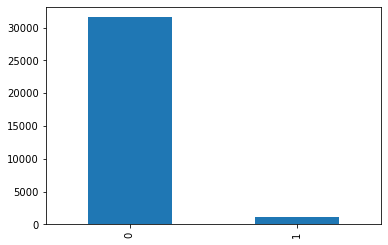

In [89]:
high_value_customers['churn']=high_value_customers['churn'].astype('int64')
high_value_customers.churn.value_counts().plot(kind="bar")
plt.show()

In [90]:
high_value_customers=high_value_customers.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action','diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'],axis=1)

### Train-Test Split

In [91]:
# Import library
from sklearn.model_selection import train_test_split

In [92]:
# Putting feature variables into X
X=high_value_customers.drop(['mobile_number','churn'],axis=1)

In [93]:
# Putting target variable to y
y=high_value_customers['churn']

In [94]:
# Splitting data into train and test set 80:20
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=100)

In [95]:
y_train.value_counts(normalize=True)

0   0.96657989434193403167
1   0.03342010565806599609
Name: churn, dtype: float64

In [96]:
y_test.value_counts(normalize=True)

0   0.96508957280661455957
1   0.03491042719338539185
Name: churn, dtype: float64

In [97]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_vbc_action,decrease_arpu_action
68402,480.92000000000001591616,620.50000000000000000000,538.70000000000004547474,119.35999999999999943157,52.60999999999999943157,66.14000000000000056843,451.62999999999999545253,508.87999999999999545253,500.56000000000000227374,0.00000000000000000000,...,0,2569,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1,1,0,0,0
43778,473.75900000000001455192,602.14400000000000545697,811.64800000000002455636,879.03999999999996362021,1223.91000000000008185452,1662.58999999999991814548,22.73000000000000042633,103.68999999999999772626,55.40999999999999658939,24.82999999999999829470,...,0,1548,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0,0,0,0,0
23242,446.65600000000000591172,572.32399999999995543476,339.03399999999999181455,41.63000000000000255795,55.68999999999999772626,39.42999999999999971578,198.12999999999999545253,295.54000000000002046363,276.25999999999999090505,0.00000000000000000000,...,0,3411,17.66000000000000014211,140.15000000000000568434,0.00000000000000000000,0,1,1,0,0
77370,338.34699999999997999112,310.74599999999998090061,327.46499999999997498890,498.68999999999999772626,469.83999999999997498890,226.93999999999999772626,170.38999999999998635758,108.35999999999999943157,70.23999999999999488409,18.94000000000000127898,...,1,2445,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1,0,1,0,1
20576,406.02499999999997726263,500.02800000000002000888,413.71399999999999863576,304.06000000000000227374,241.03000000000000113687,168.71000000000000795808,164.36000000000001364242,219.84000000000000341061,86.93999999999999772626,0.00000000000000000000,...,0,1031,205.52000000000001023182,303.05000000000001136868,410.97000000000002728484,1,0,0,1,0


## dealing with the data imbalance

In [98]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=27)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)

#### Feature scaling 

In [99]:
# Standardization method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [100]:
# List of the numeric columns
col= X_resampled_smt.columns.to_list()
# Removing the derived binary columns 
col.remove('decrease_mou_action')
col.remove('decrease_rech_num_action')
col.remove('decrease_rech_amt_action')
col.remove('decrease_arpu_action')
col.remove('decrease_vbc_action')

In [101]:
# Fit the data into scaler and transform
X_resampled_smt[col] = scaler.fit_transform(X_resampled_smt[col])

In [102]:
X_resampled_smt.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_vbc_action,decrease_arpu_action
0,-0.19599897531895288383,0.23023570192769832188,0.33280827910464100272,-0.46286831392606875291,-0.53717768833263046524,-0.35075179737209344344,0.03065945166523063870,0.21019632379946973089,0.56844639374492078598,-0.24033400754135633703,...,-0.12111848185946755274,1.73847074161557513250,-0.24533877553346783440,-0.25484193678859518029,-0.24246508684070877671,1,1,0,0,0
1,-0.21404402319685758571,0.18439377631821513015,0.97348388680215913737,0.98916868693643711374,1.74212404678239707323,3.46738230938733593689,-0.80753985414050222236,-0.60762942632300831480,-0.54374364518526629997,0.00046600382040287784,...,-0.12111848185946755274,0.54759698905918496870,-0.24533877553346783440,-0.25484193678859518029,-0.24246508684070877671,0,0,0,0,0
2,-0.28234103934472115638,0.10992187494129251890,-0.13585657972023662543,-0.61143986520692727993,-0.53118413472198056091,-0.41463250894561248794,-0.46475561949763555258,-0.22040400081646216446,0.00804152857129169368,-0.24033400754135633703,...,-0.12111848185946755274,2.72056251404699622753,-0.18334794795197020822,0.20748118851793931339,-0.24246508684070877671,0,1,1,0,0
3,-0.55526955360362073577,-0.54333805189883588316,-0.16301184777661584246,0.26217538281094471264,0.27473477042434285567,0.03382395781404841373,-0.51896790381344581888,-0.59820361064870242185,-0.50669146439826262540,-0.05665490100926934280,...,1.29631862055985869198,1.59383964923850141027,-0.24533877553346783440,-0.25484193678859518029,-0.24246508684070877671,1,0,1,0,1
4,-0.38472734577219580565,-0.07062878173026962414,0.03943561653271508011,-0.10983646622795265047,-0.17052010024215541462,-0.10544125502481377366,-0.53075233331684645854,-0.37319506003379626646,-0.46496716101707852298,-0.24033400754135633703,...,-0.12111848185946755274,-0.05542135577103409622,0.47608562336513887692,0.74485141407936972247,1.20918455275823677475,1,0,0,1,0


Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [103]:
# Transform the test set
X_test[col] = scaler.transform(X_test[col])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_vbc_action,decrease_arpu_action
77570,-0.65943239386071716979,-0.51609162520459617163,-0.07558873784837286114,-0.38708210514842772421,-0.30469397084420535293,-0.12213490409943614234,0.24735224492179316846,0.30901601018362667705,0.95853115343978800844,-0.24033400754135633703,...,-0.12111848185946755274,1.82361646535369126276,-0.24533877553346783440,-0.25484193678859518029,-0.24246508684070877671,0,1,0,0,0
47594,-0.54780559161306707772,-0.00402113311779830375,-0.27179722709556725091,-0.38822893302400363069,-0.31082374158237008333,-0.31686225476644902521,-0.49739243089179668855,-0.23919508088665211720,-0.35930723347275056456,-0.24033400754135633703,...,-0.12111848185946755274,-0.25953781678706572267,-0.24533877553346783440,-0.25484193678859518029,-0.24246508684070877671,0,0,0,0,0
28527,-1.12796106262020567890,0.86328682172751636248,-0.16049560200287235623,-0.69101060597396879448,-0.59759971418025414902,-0.50462993225192165347,-0.76223917820537323564,-0.76754535263462497774,-0.67203963192920679326,-0.24033400754135633703,...,-0.12111848185946755274,2.36481668199048344903,-0.24533877553346783440,-0.25484193678859518029,-0.24246508684070877671,1,0,0,0,0
91321,-0.96805789851738210938,-0.52436544845281030103,-0.31392321860804345279,-0.61316010702029111190,-0.53634092597789684298,-0.37760991758814060892,-0.50026525201451632618,0.30203242940566127350,0.15202785215558164977,-0.14345152210019745942,...,-0.12111848185946755274,1.43171286020291055330,-0.24533877553346783440,-0.25484193678859518029,-0.24246508684070877671,0,1,1,0,0
17828,-0.23312223259269851394,-0.55857457337102245365,-0.19080321900900662491,-0.42569197695948318705,-0.38212367804153057893,-0.12983598576423327486,0.33730867776450207396,-0.10390334113317924170,0.51218104571232991873,0.07048517748258174842,...,-0.12111848185946755274,1.94025444307713779146,-0.24533877553346783440,-0.25484193678859518029,-0.24246508684070877671,1,0,1,0,1


### Logistic regression 

In [104]:
##### Importing stats model
import statsmodels.api as sm

In [105]:
# Instantiate the model
# Adding the constant to X_train
lreg=sm.GLM(y_resampled_smt,(sm.add_constant(X_resampled_smt)),family=sm.families.Binomial())

In [106]:
# Fit the model
lreg=lreg.fit().summary()

In [107]:
lreg

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                50498
Model:                            GLM   Df Residuals:                    50359
Model Family:                Binomial   Df Model:                          138
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 08 May 2022   Deviance:                       19807.
Time:                        05:12:43   Pearson chi2:                 2.55e+09
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.134e+04   1.06e+05      0.107      0.915   -1.97e+05    2.19e+05
arpu_6                       0.1728      0.106      1.637      0.102      -0.034       0.380
arpu_7                       0.6131      0.112      5.468      0.000       0.393       0.833
arpu_8                       0.5456      0.131      4.151      0.000       0.288       0.803
onnet_mou_6                 15.9986      3.723      4.297      0.000       8.701      23.296
onnet_mou_7                 -3.8284      1.917     -1.997      0.046      -7.586      -0.071
onnet_mou_8                 -0.2406      2.089     -0.115      0.908      -4.335       3.854
offnet_mou_6                15.5067      3.638      4.262      0.000       8.376      22.637
offnet_mou_7                -2.1149      1.819     -1.163      0.245      -5.680       1.450
offnet_mou_8                -1.9890      1.978     -1.006      0.315      -5.865       1.887
roam_ic_mou_6                0.0170      0.042      0.406      0.684      -0.065       0.099
roam_ic_mou_7               -0.0003      0.058     -0.006      0.996      -0.114       0.114
roam_ic_mou_8                0.4397      0.053      8.244      0.000       0.335       0.544
roam_og_mou_6               -4.7360      1.095     -4.327      0.000      -6.881      -2.591
roam_og_mou_7                0.7390      0.512      1.442      0.149      -0.265       1.743
roam_og_mou_8                0.7818      0.701      1.115      0.265      -0.592       2.156
loc_og_t2t_mou_6         -1050.8786    671.384     -1.565      0.118   -2366.768     265.011
loc_og_t2t_mou_7           -29.4639    688.855     -0.043      0.966   -1379.595    1320.667
loc_og_t2t_mou_8          3764.7581    701.867      5.364      0.000    2389.124    5140.393
loc_og_t2m_mou_6         -1129.1483    721.280     -1.565      0.117   -2542.830     284.534
loc_og_t2m_mou_7           -30.2038    687.431     -0.044      0.965   -1377.544    1317.136
loc_og_t2m_mou_8          3881.5497    723.449      5.365      0.000    2463.616    5299.483
loc_og_t2f_mou_6           -87.1291     55.645     -1.566      0.117    -196.192      21.933
loc_og_t2f_mou_7            -2.3594     57.588     -0.041      0.967    -115.230     110.511
loc_og_t2f_mou_8           307.3651     57.305      5.364      0.000     195.049     419.681
loc_og_t2c_mou_6             0.0136      0.023      0.598      0.550      -0.031       0.058
loc_og_t2c_mou_7             0.1084      0.027      4.026      0.000       0.056       0.161
loc_og_t2c_mou_8            -0.0493      0.030     -1.637      0.102      -0.108       0.010
loc_og_mou_6              -626.1324   1362.043     -0.460      0.646   -3295.688    2043.423
loc_og_mou_7              4712.5637   1366.249      3.449      0.001    2034.764    7390.363
loc_og_mou_8  

In [108]:
#We can see that there are few features have positive coefficients and few have negative.
#Many features have higher p-values and hence became insignificant in the model.

## Feature selection using RFE

In [109]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

In [110]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(estimator=logreg,n_features_to_select=20)

# Fit the rfe model with train set
rfe = rfe.fit(X_resampled_smt,y_resampled_smt)

In [111]:
# RFE selected columns
rfe_cols = X_resampled_smt.columns[rfe.support_]
print(rfe_cols)

Index(['std_og_t2t_mou_8', 'isd_og_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_mou_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8'],
      dtype='object')


#### Model-1 with RFE selected columns

In [112]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_resampled_smt[rfe_cols])

#Instantiate the model
log_1 = sm.GLM(y_resampled_smt, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_1 = log_1.fit()

log_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                50498
Model:                            GLM   Df Residuals:                    50477
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 08 May 2022   Deviance:                       26611.
Time:                        05:13:35   Pearson chi2:                 4.50e+15
No. Iterations:                    94                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.223e+04   1.06e+05      0.115      0.908   -1.95e+05     2.2e+05
std_og_t2t_mou_8      0.2198      0.027      8.111      0.000       0.167       0.273
isd_og_mou_8         -2.8053      0.449     -6.252      0.000      -3.685      -1.926
og_others_8       -2050.3103   2.96e+05     -0.007      0.994   -5.83e+05    5.78e+05
total_og_mou_8       -0.9392      0.034    -27.724      0.000      -1.006      -0.873
loc_ic_mou_8         -3.4291      0.061    -56.091      0.000      -3.549      -3.309
total_rech_data_6  9.141e+04   2.16e+06      0.042      0.966   -4.13e+06    4.32e+06
total_rech_data_7  3.046e+04   2.53e+06      0.012      0.990   -4.93e+06    4.99e+06
total_rech_data_8  1.972e+05   2.98e+06      0.066      0.947   -5.64e+06    6.04e+06
monthly_2g_6      -1.477e+04   3.48e+05     -0.042      0.966   -6.97e+05    6.68e+05
monthly_2g_7      -4524.1402   3.76e+05     -0.012      0.990   -7.41e+05    7.32e+05
monthly_2g_8      -2.834e+04   4.28e+05     -0.066      0.947   -8.67e+05    8.11e+05
sachet_2g_6       -7.034e+04   1.66e+06     -0.042      0.966   -3.32e+06    3.18e+06
sachet_2g_7       -2.327e+04   1.93e+06     -0.012      0.990   -3.81e+06    3.76e+06
sachet_2g_8       -1.495e+05   2.26e+06     -0.066      0.947   -4.58e+06    4.28e+06
monthly_3g_6       -2.13e+04   5.02e+05     -0.042      0.966   -1.01e+06    9.63e+05
monthly_3g_7      -7141.9218   5.93e+05     -0.012      0.990   -1.17e+06    1.15e+06
monthly_3g_8      -4.411e+04   6.66e+05     -0.066      0.947   -1.35e+06    1.26e+06
sachet_3g_6       -3.427e+04   8.08e+05     -0.042      0.966   -1.62e+06    1.55e+06
sachet_3g_7       -1.142e+04   9.48e+05     -0.012      0.990   -1.87e+06    1.85e+06
sachet_3g_8       -7.445e+04   1.12e+06     -0.066      0.947   -2.28e+06    2.13e+06
=====================================================================================
"""

### Model performance on the train set

In [113]:
# Getting the predicted value on the train set
y_train_pred= log_1.predict(X_train_sm_1)
y_train_pred.head()

0   0.19998269335441692940
1   0.11961553596343604822
2   0.00497817757272395883
3   0.15819128261053977402
4   0.00410230774581346429
dtype: float64

In [114]:
### Creating a dataframe with the actual churn and the predicted probabilities

In [115]:
y_train_pred_final= pd.DataFrame({'churn':y_resampled_smt.values, 'churn_prob':y_train_pred.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.19998269335441692940,0
1,0,0.11961553596343604822,1
2,0,0.00497817757272395883,2
3,0,0.15819128261053977402,3
4,0,0.00410230774581346429,4


In [116]:
## Finding Optimal Probablity Cutoff Point

In [117]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.19998269335441692940,0,1,1,0,0,0,0,0,0,0,0
1,0,0.11961553596343604822,1,1,1,0,0,0,0,0,0,0,0
2,0,0.00497817757272395883,2,1,0,0,0,0,0,0,0,0,0
3,0,0.15819128261053977402,3,1,1,0,0,0,0,0,0,0,0
4,0,0.00410230774581346429,4,1,0,0,0,0,0,0,0,0,0


In [118]:
# Creating a dataframe
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

                                  probability               accuracy  \
0.00000000000000000000 0.00000000000000000000 0.50253475385163770550   
0.10000000000000000555 0.10000000000000000555 0.80589330270505765696   
0.20000000000000001110 0.20000000000000001110 0.83646877104043726447   
0.29999999999999998890 0.29999999999999998890 0.85920234464731271018   
0.40000000000000002220 0.40000000000000002220 0.87649015802606045078   
0.50000000000000000000 0.50000000000000000000 0.88841142223454394600   
0.59999999999999997780 0.59999999999999997780 0.89623351419858210409   
0.69999999999999995559 0.69999999999999995559 0.89403540734286501834   
0.80000000000000004441 0.80000000000000004441 0.87472771198859355923   
0.90000000000000002220 0.90000000000000002220 0.71464216404610081401   

                                  sensitivity            specificity  
0.00000000000000000000 1.00000000000000000000 0.00506950770327537718  
0.10000000000000000555 0.98023684106301234298 0.63154976434710285

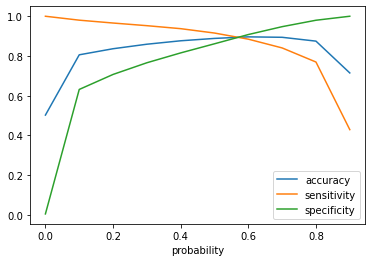

In [119]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

Accuracy - Becomes stable around 0.6

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

In [120]:
#At point 0.6 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and
#specificity with a good accuracy

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking 0.5 for acheiving higher sensitivity, which is our main goal.

In [121]:
# Creating a column with name "predicted", which is the predicted value for 0.6 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.19998269335441692940,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.11961553596343604822,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0.00497817757272395883,2,1,0,0,0,0,0,0,0,0,0,0
3,0,0.15819128261053977402,3,1,1,0,0,0,0,0,0,0,0,0
4,0,0.00410230774581346429,4,1,0,0,0,0,0,0,0,0,0,0


## metrics

In [122]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[22923  2326]
 [ 2914 22335]]


In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8962335141985821
Sensitivity:- 0.8845894886926214
Specificity:- 0.9078775397045428


In [125]:
### We have got good accuracy, sensitivity and specificity on the train set prediction.

In [126]:

# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

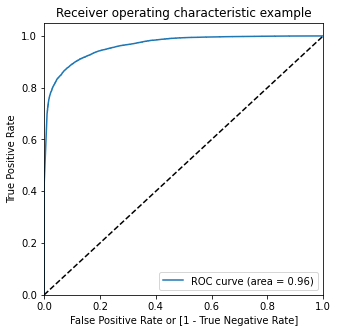

In [127]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

In [128]:
#ROC curve is closer to 1

### Testing the model on the test set

In [129]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [130]:
X_test_log = X_test_log[rfe_cols]

In [131]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [132]:
## Predictions on the test set with final model

In [133]:
# Predict on the test set
y_test_pred = log_1.predict(X_test_sm)

In [134]:
y_test_pred.head()

77570   0.00108033256699901180
47594   0.68976968918736170089
28527   0.84268604561282900445
91321   0.49020309864751521189
17828   0.00000003118563370975
dtype: float64

In [135]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
77570,0.00108033256699901180
47594,0.68976968918736170089
28527,0.84268604561282900445
91321,0.49020309864751521189
17828,0.00000003118563370975


In [136]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
77570,0
47594,0
28527,1
91321,0
17828,0


In [137]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [138]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [139]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [140]:
y_test_pred_final.head()

,churn,CustID,0
0,0,77570,0.00108033256699901180
1,0,47594,0.68976968918736170089
2,1,28527,0.84268604561282900445
3,0,91321,0.49020309864751521189
4,0,17828,0.00000003118563370975


In [141]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [142]:
y_test_pred_final

,churn,CustID,churn_prob
0,0,77570,0.00108033256699901180
1,0,47594,0.68976968918736170089
2,1,28527,0.84268604561282900445
3,0,91321,0.49020309864751521189
4,0,17828,0.00000003118563370975
...,...,...,...
6526,0,26375,0.00003310988540456326
6527,0,44401,0.00680067265597329544
6528,0,59556,0.23960580036336495691
6529,0,58895,0.00267373709015950034


In [143]:
# In the test set using probablity cutoff 0.6, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)

In [144]:
y_test_pred_final.head()

,churn,CustID,churn_prob,test_predicted
0,0,77570,0.00108033256699901180,0
1,0,47594,0.68976968918736170089,1
2,1,28527,0.84268604561282900445,1
3,0,91321,0.49020309864751521189,0
4,0,17828,0.00000003118563370975,0


In [145]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[5742  561]
 [ 102  126]]


In [146]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [147]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8984841525034452
Sensitivity:- 0.5526315789473685
Specificity:- 0.9109947643979057


In [148]:
### model is performing good on the test set

In [149]:
log_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                50498
Model:                            GLM   Df Residuals:                    50477
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 08 May 2022   Deviance:                       26611.
Time:                        05:13:36   Pearson chi2:                 4.50e+15
No. Iterations:                    94                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.223e+04   1.06e+05      0.115      0.908   -1.95e+05     2.2e+05
std_og_t2t_mou_8      0.2198      0.027      8.111      0.000       0.167       0.273
isd_og_mou_8         -2.8053      0.449     -6.252      0.000      -3.685      -1.926
og_others_8       -2050.3103   2.96e+05     -0.007      0.994   -5.83e+05    5.78e+05
total_og_mou_8       -0.9392      0.034    -27.724      0.000      -1.006      -0.873
loc_ic_mou_8         -3.4291      0.061    -56.091      0.000      -3.549      -3.309
total_rech_data_6  9.141e+04   2.16e+06      0.042      0.966   -4.13e+06    4.32e+06
total_rech_data_7  3.046e+04   2.53e+06      0.012      0.990   -4.93e+06    4.99e+06
total_rech_data_8  1.972e+05   2.98e+06      0.066      0.947   -5.64e+06    6.04e+06
monthly_2g_6      -1.477e+04   3.48e+05     -0.042      0.966   -6.97e+05    6.68e+05
monthly_2g_7      -4524.1402   3.76e+05     -0.012      0.990   -7.41e+05    7.32e+05
monthly_2g_8      -2.834e+04   4.28e+05     -0.066      0.947   -8.67e+05    8.11e+05
sachet_2g_6       -7.034e+04   1.66e+06     -0.042      0.966   -3.32e+06    3.18e+06
sachet_2g_7       -2.327e+04   1.93e+06     -0.012      0.990   -3.81e+06    3.76e+06
sachet_2g_8       -1.495e+05   2.26e+06     -0.066      0.947   -4.58e+06    4.28e+06
monthly_3g_6       -2.13e+04   5.02e+05     -0.042      0.966   -1.01e+06    9.63e+05
monthly_3g_7      -7141.9218   5.93e+05     -0.012      0.990   -1.17e+06    1.15e+06
monthly_3g_8      -4.411e+04   6.66e+05     -0.066      0.947   -1.35e+06    1.26e+06
sachet_3g_6       -3.427e+04   8.08e+05     -0.042      0.966   -1.62e+06    1.55e+06
sachet_3g_7       -1.142e+04   9.48e+05     -0.012      0.990   -1.87e+06    1.85e+06
sachet_3g_8       -7.445e+04   1.12e+06     -0.066      0.947   -2.28e+06    2.13e+06
=====================================================================================
"""

recommendations
1)Cutomers decreasing monthly 2g usage for August are most probable to churn.

2)Cutomers decreasing monthly 2g usage for June are most probable to churn.

3)Cutomers decreasing monthly 3g usage for June are most probable to churn.

4)Cutomers decreasing monthly 3g usage for August are most probable to churn.

5)Cutomers decreasing total incoming calls and minutes of usage voice calls for August are most probable to churn.

6)if customer is using sachet schemes in the month of june and august then he is most probaly going to churn

### Decision Tree

In [150]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [151]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_resampled_smt,y_resampled_smt)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [152]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.20995531082153329194,0.03740869467118825703,0.00620222091674804688,0.00133600014249287205,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.96059405940594055906,0.97089108910891086524,0.97861386138613859487,0.97425232719350363109,0.97386138613861383817,0.97164254464662147548,0.00604925104669940417,5
1,1.22779812812805166899,0.08692281752598181310,0.00492615699768066389,0.00017027983775809010,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.96059405940594055906,0.97089108910891086524,0.97861386138613859487,0.97425232719350363109,0.97386138613861383817,0.97164254464662147548,0.00604925104669940417,5
2,1.22606482505798330962,0.07308185244417816917,0.00532584190368652361,0.00031055084418944408,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.96633663366336630673,0.97346534653465344178,0.97999999999999998224,0.97603485838779957540,0.97564356435643562193,0.97429608058845107443,0.00450370229511929277,1
3,1.20640201568603511184,0.06704080683816182606,0.00497798919677734392,0.00032470654752209490,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.96633663366336630673,0.97346534653465344178,0.97999999999999998224,0.97603485838779957540,0.97564356435643562193,0.97429608058845107443,0.00450370229511929277,1
4,2.08712444305419930757,0.22676261695440616539,0.00466237068176269566,0.00010048969494898686,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.93980198019801974851,0.97801980198019800028,0.98178217821782176600,0.98177857001386414915,0.98059405940594057682,0.97239531796316891477,0.01635443923137442149,3
5,2.12520623207092285156,0.24116244341925488492,0.00467586517333984375,0.00004986836773371735,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.93980198019801974851,0.97742574257425740569,0.98158415841584156780,0.98177857001386414915,0.98059405940594057682,0.97223690212158475621,0.01629235974132409517,4
6,1.99678001403808602632,0.18440227004642240072,0.00475010871887207066,0.00019453440167703289,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.95287128712871282943,0.98079207920792077502,0.96712871287128709952,0.97544068132303429763,0.98118811881188117141,0.97148417586856727901,0.01060063388478202535,7
7,2.00743203163146954893,0.20033216075106902165,0.00478858947753906233,0.00024763496501349511,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.95287128712871282943,0.98079207920792077502,0.96712871287128709952,0.97544068132303429763,0.98118811881188117141,0.97148417586856727901,0.01060063388478202535,7


In [153]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.9742960805884511
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


#### Model with optimal hyperparameters

In [154]:
# Model with optimal hyperparameters
dt= DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)

dt.fit(X_resampled_smt, y_resampled_smt)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)

Prediction on the train set

In [155]:
# Predictions on the train set
y_train_pred = dt.predict(X_resampled_smt)

In [156]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_resampled_smt, y_train_pred)
print(confusion)

[[23397  1852]
 [  747 24502]]


In [157]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [158]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_resampled_smt, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9485326151530754
Sensitivity:- 0.9704146698879164
Specificity:- 0.9266505604182343


Prediction on the test set

In [159]:
# Prediction on the test set
y_test_pred = dt.predict(X_test)

In [160]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5834  469]
 [  42  186]]


In [161]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [162]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9217577706323687
Sensitivity:- 0.8157894736842105
Specificity:- 0.9255909884182135


We can see that decision tree has given us a better model than logisitic regression 

model summary 




train set decison tree:

Accuracy:- 0.9499649941656942

Sensitivity:- 0.9784364060676779

Specificity:- 0.9214935822637106







test set decision tree :

Accuracy:- 0.9177043854899838

Sensitivity:- 0.8186528497409327

Specificity:- 0.9212789827973074







train set logisitic regression:

Accuracy:- 0.8208168028004668

Sensitivity:- 0.8870945157526254

Specificity:- 0.7545390898483081








test set logisitc regression:

Accuracy:- 0.751849846598087

Sensitivity:- 0.8290155440414507

Specificity:- 0.7490650710545999




recommendations 1)Cutomers decreasing monthly 2g usage for August are most probable to churn.

2)Cutomers decreasing monthly 2g usage for June are most probable to churn.

3)Cutomers decreasing monthly 3g usage for June are most probable to churn.

4)Cutomers decreasing monthly 3g usage for August are most probable to churn.

5)Cutomers decreasing total incoming calls and minutes of usage voice calls for August are most probable to churn.

6)if customer is using sachet schemes in the month of june and august then he is most probaly going to churn